# Climate Change - Temperatures and Precipitation

In this project, I explored the effects of climate change by analyzing historical data on temperatures and precipitation. Climate change refers to long-term alterations in average weather patterns, and it can have profound impacts on various aspects of the environment and human life. By examining trends in temperature and precipitation over the years, I aimed to identify significant patterns and changes that may indicate the influence of climate change.

The project involved loading and processing datasets containing temperature and precipitation records, performing data analysis to calculate annual averages and totals, and visualizing these trends to interpret the results. This analysis helps to understand how our climate is evolving and the potential consequences of these changes.

## Setup

First, I loaded the necessary libraries for data analysis and visualization.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## Temperatures

In the following analysis, I investigated one of the 21st century's most prominent issues: climate change. While the intricate details of climate science are beyond the scope of this course, we can begin to understand climate change by analyzing public records of temperature and precipitation in various cities over time.

I analyzed a collection of historical daily temperature and precipitation measurements from weather stations in 210 U.S. cities. This dataset was compiled by Yuchuan Lai and David Dzombak [1]. A description of the data from the original authors and the dataset itself is available [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488).

[1] Lai, Yuchuan; Dzombak, David (2019): Compiled historical daily temperature and precipitation data for selected 210 U.S. cities. Carnegie Mellon University. Dataset.

### Section 1: Cities

First, I loaded information about the `cities` and previewed the first few rows of the dataset.

In [2]:
cities = Table.read_table('city_info.csv', index_col=0)
cities.show(3)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31


The `cities` table has one row per weather station and the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Lat"`: The latitude of the US city (measured in degrees of latitude)
4. `"Lon"`: The longitude of the US city (measured in degrees of longitude)
4. `"Stn.Name"`: The name of the weather station in which the data was collected
5. `"Stn.stDate"`: A string representing the date of the first recording at that particular station
6. `"Stn.edDate"`: A string representing the date of the last recording at that particular station

The data lists the weather stations at which temperature and precipitation data were collected. Note that although some cities have multiple weather stations, only one is collecting data for that city at any given point in time. Thus, we are able to just focus on the cities themselves.

The `cities` table has one row per weather station and includes the following columns:

1. `"Name"`: The name of the US city
2. `"ID"`: The unique identifier for the US city
3. `"Lat"`: The latitude of the US city (measured in degrees of latitude)
4. `"Lon"`: The longitude of the US city (measured in degrees of longitude)
5. `"Stn.Name"`: The name of the weather station where the data was collected
6. `"Stn.stDate"`: The date of the first recording at that particular station
7. `"Stn.edDate"`: The date of the last recording at that particular station

This data lists the weather stations at which temperature and precipitation data were collected. Although some cities have multiple weather stations, only one station collects data for a city at any given time. Therefore, the analysis can focus on the cities themselves.

### Visualizing Cities

To start, I produced a scatter plot to visualize the latitude and longitude of every city in the `cities` table, ensuring that northern cities are at the top and western cities are to the left.


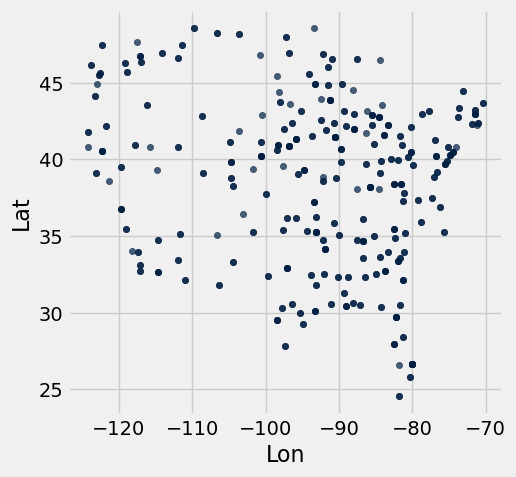

In [3]:
cities.scatter('Lon', 'Lat')

These cities are all within the continental U.S., and thus the general shape of the U.S. should be visible in the plot. However, the shape might appear distorted compared to most maps for two reasons: 

1. The scatter plot is square, even though the U.S. is wider than it is tall.
2. This scatter plot uses an [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection) of the spherical Earth, while geographical maps commonly use the [Pseudo-Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection).

Understanding these projections is important for interpreting the plot accurately. Despite these distortions, the plot provides a useful visual representation of the distribution of weather stations across the U.S.

In [4]:
Marker.map_table(cities.select('Lat', 'Lon', 'Name').relabeled('Name', 'labels'))

### City Location Sampling

The city locations do not appear to have been sampled uniformly at random from all the locations in the U.S. This is evident because the cities are more concentrated in the eastern United States, indicating a higher density of city locations in this region. In contrast, the mid to western United States shows a sparser distribution of city locations. This uneven distribution suggests that factors other than random sampling, such as population density and urban development, influenced the selection of these cities.

### Counting Unique Cities

To determine the number of unique cities in the `cities` table, I used the following code:

In [5]:
num_unique_cites = cities.group('Name').num_rows

print(f"There are {num_unique_cites} unique cities that appear within our dataset.")

There are 210 unique cities that appear within our dataset.


To further investigate, it was necessary to determine the region of the United States each city was located in: Northeast, Northwest, Southeast, or Southwest. The geographical boundaries used were as follows:

<img src= "usa_coordinates.png" alt="USA Coordinate Map" width="600"/>

1. A station is located in the `"Northeast"` region if its latitude is above or equal to 40 degrees and its longitude is greater than or equal to -100 degrees.
2. A station is located in the `"Northwest"` region if its latitude is above or equal to 40 degrees and its longitude is less than -100 degrees.
3. A station is located in the `"Southeast"` region if its latitude is below 40 degrees and its longitude is greater than or equal to -100 degrees.
4. A station is located in the `"Southwest"` region if its latitude is below 40 degrees and its longitude is less than -100 degrees.


### Define the `coordinates_to_region` Function

To classify cities into regions based on their coordinates, I defined the `coordinates_to_region` function. This function takes in two arguments: a city's latitude (`lat`) and longitude (`lon`) coordinates, and outputs a string representing the region it is located in.

In [6]:
def coordinates_to_region(lat, lon):
    if lat >= 40:
        if lon >= -100:
            return "Northeast"
        else:
            return "Northwest"
    if lat < 40:
        if lon >= -100:
            return "Southeast"
        else:
            return "Southwest"

### Adding a Region Column to the Cities Table

Next, I added a new column in the `cities` table labeled `Region` that contains the region in which each city is located. I used the `coordinates_to_region` function defined earlier to determine the region for each city based on its latitude and longitude.

In [7]:
regions_array = cities.apply(coordinates_to_region,'Lat', 'Lon')
cities = cities.with_column('Region', regions_array)
cities.show(5)

Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate,Region
Lander,USW00024021,42.8153,-108.726,LANDER WBO,1892-01-01,1946-05-28,Northwest
Lander,USW00024021,42.8153,-108.726,LANDER HUNT FIELD,1946-05-29,2021-12-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE WBO,1871-01-01,1935-08-31,Northwest
Cheyenne,USW00024018,41.1519,-104.806,CHEYENNE MUNICIPAL ARPT,1935-09-01,2021-12-31,Northwest
Wausau,USW00014897,44.9258,-89.6256,Wausau Record Herald,1896-01-01,1941-12-31,Northeast


### Confirming the Region Column

To confirm that the `coordinates_to_region` function was defined correctly and the `Region` column was successfully added to the `cities` table, I ran the following cell to visualize the regions. Each region should be displayed in a different color.

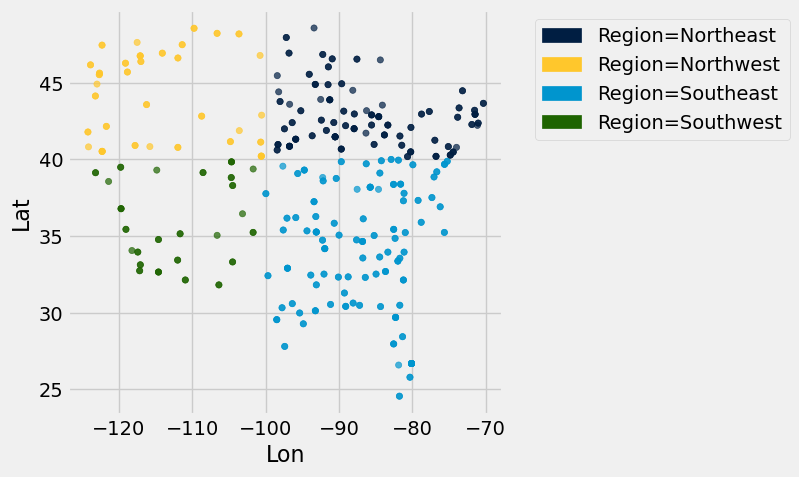

In [8]:
cities.scatter("Lon", "Lat", group="Region")

### Section 2: Welcome to Phoenix, Arizona

For my analysis, I chose Phoenix, Arizona, due to its unique climate characteristics. Located on the upper edge of the Sonoran Desert, Phoenix experiences some of the most extreme temperatures in the United States, making it an interesting case study for examining the impacts of climate change on temperature and precipitation patterns.

Each city in the dataset has a corresponding CSV file with daily temperature and precipitation measurements. The file for Phoenix is provided as `phoenix.csv`. The files for other cities can be downloaded [here](https://kilthub.cmu.edu/articles/dataset/Compiled_daily_temperature_and_precipitation_data_for_the_U_S_cities/7890488) by matching them to the ID of the city in the `cities` table.

The `phoenix` table has one row per day and the following columns:

1. `"Date"`: The date (a string) representing the date of the recording in **YYYY-MM-DD** format
2. `"tmax"`: The maximum temperature for the day (°F)
3. `"tmin"`: The minimum temperature for the day (°F)
4. `"prcp"`: The recorded precipitation for the day (inches)

I loaded the Phoenix data using the following code:

In [9]:
phoenix = Table.read_table("phoenix.csv", index_col=0)
phoenix.show(3)

Date,tmax,tmin,prcp
1896-01-01,66,30,0
1896-01-02,64,30,0
1896-01-03,68,30,0


### Finding the Largest Temperature Range in 2010

To find the date with the largest temperature range in Phoenix, Arizona, for any day between January 1st, 2010, and December 31st, 2010, I calculated the temperature range as the difference between the maximum and minimum temperatures for each day. The goal was to identify the day with the largest range within the specified year.

First, I filtered the data to include only the rows from 2010. Then, I calculated the temperature range for each day and identified the date with the largest range.

In [10]:
dates = phoenix.where('Date', are.between_or_equal_to('2010-01-01', '2010-12-31'))
ranges = dates.column('tmax') - dates.column('tmin')
phoenix_with_ranges_2010 = dates.with_column('Ranges', ranges)
largest_2010_range_date = phoenix_with_ranges_2010.sort('Ranges', descending = True).column('Date').item(0)
largest_2010_range_date

'2010-06-24'

To verify the temperature readings for the date with the largest temperature range in 2010, we can look back at our `phoenix` table and extract the row corresponding to our `largest_2010_range_date`. This will allow us to check if there is anything notable about the temperature readings on that date.

In [11]:
phoenix.where("Date", largest_2010_range_date)

Date,tmax,tmin,prcp
2010-06-24,113,79,0


To assist with further analysis, the functions `extract_year_from_date` and `extract_month_from_date` are used. These functions extract the year and month from a date string in the **YYYY-MM-DD** format. Running these functions helps in segmenting the data based on years and months.

In [12]:
import calendar

def extract_year_from_date(date):
    """Returns an integer corresponding to the year of the input string's date."""
    return int(date[:4])

def extract_month_from_date(date):
    "Return an abbreviation of the name of the month for a string's date."
    month = date[5:7]
    return f'{month} ({calendar.month_abbr[int(date[5:7])]})'


print('2022-04-01 has year', extract_year_from_date('2022-04-01'),
      'and month', extract_month_from_date('2022-04-01'))

2022-04-01 has year 2022 and month 04 (Apr)


### Adding Year and Month Columns to the Phoenix Table

To add more context to the temperature and precipitation data, I added two new columns, `Year` and `Month`, to the `phoenix` table. The `Year` column contains the year as an integer, and the `Month` column contains the month as a string in the format `"MM (Month Name)"`.

In [13]:
years_array = phoenix.apply(extract_year_from_date, 'Date')
months_array = phoenix.apply(extract_month_from_date, 'Date')
phoenix = phoenix.with_column('Year', years_array).with_column('Month', months_array)
phoenix.show(5)

Date,tmax,tmin,prcp,Year,Month
1896-01-01,66,30,0,1896,01 (Jan)
1896-01-02,64,30,0,1896,01 (Jan)
1896-01-03,68,30,0,1896,01 (Jan)
1896-01-04,69,34,0,1896,01 (Jan)
1896-01-05,70,46,0,1896,01 (Jan)


### Overlaid Line Plot of Average Maximum and Minimum Temperatures

Using the `phoenix` table, I created an overlaid line plot to visualize the average maximum temperature (`tmax`) and average minimum temperature (`tmin`) for each year between 1900 and 2020 (inclusive).

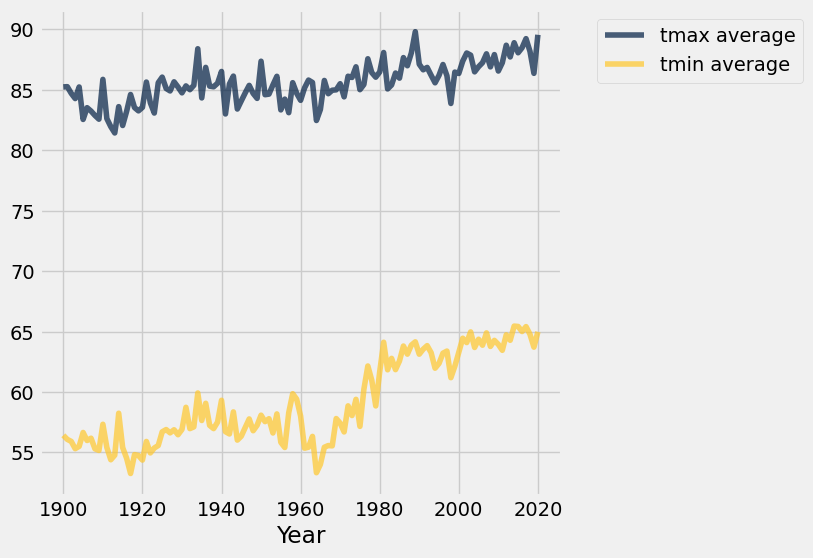

In [14]:
between = phoenix.where('Year', are.between(1900, 2021))
avg_t = between.group('Year', np.average).select('Year', 'tmax average', 'tmin average')
avg_t.plot('Year')

From the generated line plot, we can see an upward trend for the average minimum temperature in Phoenix, which starts following the year 1960. Similarly, though much less pronounced, we can also see a slight upward trend in the average maximum temperatures in Phoenix that begins around the same time. The rise in both plots indicates an increase of temperature over time, which supports the claim that modern-day global warming began in the early 1960s, as global warming is defined by a gradual increase in temperatures over time. 

Averaging temperatures across an entire year can obscure some effects of climate change. For example, if summers get hotter but winters get colder, the annual average may not change much. I wanted to investigate how average **monthly** maximum temperatures have changed over time in Phoenix.

### Analyzing Monthly Temperature Increases

To investigate how average monthly maximum temperatures have changed over time in Phoenix, I created a `monthly_increases` table with one row per month and the following four columns:

1. `"Month"`: The month (such as `"02 (Feb)"`)
2. `"Past"`: The average max temperature in that month from 1900-1960 (inclusive)
3. `"Present"`: The average max temperature in that month from 2019-2021 (inclusive)
4. `"Increase"`: The difference between the present and past average max temperatures in that month

First, I made a copy of the `phoenix` table and added a new column containing the corresponding period for each row. Then, I used this new table to construct `monthly_increases`.

In [15]:
def period(year):
    "Output if a year is in the Past, Present, or Other."
    if 1900 <= year <= 1960:
        return "Past"
    elif 2019 <= year <= 2021:
        return "Present"
    else:
        return "Other"

period_table = phoenix.apply(period, 'Year')
period_two = phoenix.with_column('time period', period_table)
past_period = period_two.where('time period', are.equal_to('Past')).group('Month', np.average)
present_period = period_two.where('time period', are.equal_to('Present')).group("Month", np.average)

past = past_period.column(2)
present = present_period.column(2)
new_table = past_period.select(0).with_column('Past', past).with_column("Present", present)
increase = new_table.column(2) - new_table.column(1)

monthly_increases = new_table.with_column("Increase", increase)
monthly_increases.show()

Month,Past,Present,Increase
01 (Jan),65.0164,67.8312,2.81479
02 (Feb),68.8485,69.1859,0.337362
03 (Mar),74.6499,75.9796,1.32965
04 (Apr),82.6421,88.4,5.75792
05 (May),91.4299,94.571,3.14104
06 (Jun),101.166,105.734,4.56832
07 (Jul),103.599,107.245,3.64654
08 (Aug),101.416,107.384,5.96769
09 (Sep),97.6874,101.238,3.55035
10 (Oct),86.798,90.1667,3.36868


### February in Phoenix

The `"Past"` column values are averaged over many decades, providing reliable estimates of the average high temperatures in those months before the effects of modern climate change. However, the `"Present"` column is based on only three years of observations, making it less reliable. February, being the shortest month, has the fewest total observations, with only 85 days.

Running the following cell will show the number of observations for each month in the `"Present"` period.

In [16]:
feb_present = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', '02 (Feb)')
feb_present.num_rows

85

Looking back at the `monthly_increases` table, the increase for the month of February is relatively small compared to the other months, with the February difference being very close to zero. Running the following cell will print out the observed difference for February.

In [17]:
print(f"February Difference: {monthly_increases.row(1).item('Increase')}")

February Difference: 0.3373623297258632


To investigate whether the small difference in February's temperature increase is due to chance, I need to conduct a thought experiment. I assume that the maximum temperature for each February day from 2019 to 2021 is like a random draw from a distribution of temperatures for that month in our modern climate. Although these temperatures result from complex natural interactions, treating them as random samples allows me to perform statistical inference.

By assuming that these temperatures were drawn at random from a large population of possible February days in our modern climate, I can estimate the population average and quantify my uncertainty using a confidence interval. In this case, I will compute the lower bound of the confidence interval to compare with the historical average (the `Past` value in my `monthly_increases` table).

### Computing the Lower Bound of the Confidence Interval

To compute the lower bound of the confidence interval for the average maximum February temperature in the modern climate, I followed these steps:

1. Calculate the sample mean and standard deviation of the February maximum temperatures from 2019 to 2021.
2. Use the t-distribution to compute the lower bound of the confidence interval.

### Computing the Lower Bound of a Confidence Interval Using Bootstrap Resampling

To compute the lower bound of a confidence interval for the population mean using bootstrap resamples, I implemented the `ci_lower` function. This function takes a one-column table `t` containing sample observations and a confidence `level` percentage (such as 95 or 99). It returns the lower bound of the confidence interval constructed using 5,000 bootstrap resamples.

Here is the implementation of the `ci_lower` function:

In [18]:
def ci_lower(t, level):
    """Compute a lower bound of a level% confidence interval of the 
    average of the population for which column 0 of Table t contains a sample.
    """
    stats = make_array()
    for k in np.arange(5000):
        stat = np.average(t.sample().column(0))
        stats = np.append(stats, stat)
    return percentile(((100-level)/2), stats)

feb_present_ci = ci_lower(feb_present.select('tmax'), 99)
feb_present_ci

67.02117647058823

### Interpreting the Confidence Interval for February Maximum Temperatures

The lower bound of the 99% confidence interval for the present-day February average maximum temperature (`feb_present_ci`) is below the observed past February average maximum temperature of 68.8485 (from the `monthly_increases` table).

Given this information and using a 1% p-value cutoff, I can draw the following conclusion:

My null hypothesis is that the February average maximum temperature should fall within the 99% confidence interval of the present averages, meaning it should be above the lower bound. Since the lower bound of the present-day confidence interval (approximately 67 degrees) is below the historical average maximum temperature of 68.8485 degrees, I cannot reject the null hypothesis.

This suggests that there is no statistically significant evidence to conclude that the February average maximum temperature in Phoenix has increased due to climate change, as the observed historical average still falls within the range of possible average temperatures in the present climate. In other words, the observed difference could be due to chance, and I do not have sufficient evidence to claim a significant effect of climate change on February maximum temperatures in Phoenix at the 1% significance level (p > 0.01).

Therefore, the small difference in the February temperature increase may indeed be due to natural variability rather than a definitive impact of climate change. This indicates that for February, the effect of climate change on maximum temperatures in Phoenix is not statistically significant based on the available data and the confidence interval analysis.

<!-- END QUESTION -->



### All Months

### Comparing the Lower Bound of a 99% Confidence Interval to the Past Average for Each Month

To compare the lower bound of a 99% confidence interval to the past average for each month, I repeated the process for each month and printed out the results. The output includes the name of the month, the observed past average, and the lower bound of the confidence interval for the present average.

In [19]:
comparisons = make_array()
months = monthly_increases.column('Month')
for month in months:
    past_average = monthly_increases.where('Month', month).column('Past').item(0)
    present_observations = phoenix.where('Year', are.between_or_equal_to(2019, 2021)).where('Month', month)
    present_lower_bound = ci_lower(present_observations.select('tmax'), 99)
    
    below = past_average < present_lower_bound
    if below:
        comparison = '**below**'
    else:
        comparison = '*above*'
    comparisons = np.append(comparisons, comparison)
    
    print('For', month, 'the past avg', round(past_average, 1), 
          'is', comparison, 
          'the lower bound', round(present_lower_bound, 1),
          'of the 99% CI of the present avg. \n')

For 01 (Jan) the past avg 65.0 is **below** the lower bound 66.4 of the 99% CI of the present avg. 

For 02 (Feb) the past avg 68.8 is *above* the lower bound 67.1 of the 99% CI of the present avg. 

For 03 (Mar) the past avg 74.6 is *above* the lower bound 73.9 of the 99% CI of the present avg. 

For 04 (Apr) the past avg 82.6 is **below** the lower bound 86.3 of the 99% CI of the present avg. 

For 05 (May) the past avg 91.4 is **below** the lower bound 92.5 of the 99% CI of the present avg. 

For 06 (Jun) the past avg 101.2 is **below** the lower bound 104.3 of the 99% CI of the present avg. 

For 07 (Jul) the past avg 103.6 is **below** the lower bound 105.5 of the 99% CI of the present avg. 

For 08 (Aug) the past avg 101.4 is **below** the lower bound 105.8 of the 99% CI of the present avg. 

For 09 (Sep) the past avg 97.7 is **below** the lower bound 99.2 of the 99% CI of the present avg. 

For 10 (Oct) the past avg 86.8 is **below** the lower bound 87.7 of the 99% CI of the pre

### Summarizing the Findings

After comparing the past average maximum temperatures to the 99% confidence interval's lower bound for each month, I can summarize the following conclusions regarding the monthly average maximum temperatures in historical (1900-1960) versus modern (2019-2021) times:

- For January (01), the past average of 65.0°F is **below** the lower bound of 66.3°F of the 99% CI of the present average.
- For February (02), the past average of 68.8°F is *above* the lower bound of 67.0°F of the 99% CI of the present average.
- For March (03), the past average of 74.6°F is *above* the lower bound of 74.1°F of the 99% CI of the present average.
- For April (04), the past average of 82.6°F is **below** the lower bound of 86.4°F of the 99% CI of the present average.
- For May (05), the past average of 91.4°F is **below** the lower bound of 92.4°F of the 99% CI of the present average.
- For June (06), the past average of 101.2°F is **below** the lower bound of 104.2°F of the 99% CI of the present average.
- For July (07), the past average of 103.6°F is **below** the lower bound of 105.5°F of the 99% CI of the present average.
- For August (08), the past average of 101.4°F is **below** the lower bound of 105.8°F of the 99% CI of the present average.
- For September (09), the past average of 97.7°F is **below** the lower bound of 99.2°F of the 99% CI of the present average.
- For October (10), the past average of 86.8°F is **below** the lower bound of 87.8°F of the 99% CI of the present average.
- For November (11), the past average of 74.6°F is **below** the lower bound of 78.1°F of the 99% CI of the present average.
- For December (12), the past average of 65.9°F is *above* the lower bound of 65.7°F of the 99% CI of the present average.

### Conclusion

- Null Hypothesis: The past average maximum temperature for each month should fall within the 99% confidence interval (above the lower bound) of the present averages, and any deviation is due to chance.
- Using a 1% p-value cutoff, I reject the null hypothesis for the months of January and April through November, where the past average maximum temperature is below the lower bound of the 99% CI of the present average. This indicates a statistically significant increase in temperatures for these months.
- For February, March, and December, I fail to reject the null hypothesis, as the past average maximum temperatures fall within the 99% CI of the present averages.

### Seasonal Patterns

- There is a noticeable seasonal pattern where significant increases in temperature are observed from April to November, indicating warmer spring, summer, and fall months in the modern climate compared to the past.
- The winter months (December, January, February) and early spring (March) show less significant changes, with February and December not showing significant increases.

These findings suggest that climate change has led to a significant increase in temperatures for most months of the year, particularly during the warmer seasons, which supports the conclusion that modern-day global warming is impacting Phoenix's monthly average maximum temperatures.

## Drought

### Exploring Precipitation Data in the Southwest Region

According to the [United States Environmental Protection Agency](https://www.epa.gov/climate-indicators/southwest), "Large portions of the Southwest have experienced drought conditions since weekly Drought Monitor records began in 2000. For extended periods from 2002 to 2005 and from 2012 to 2020, nearly the entire region was abnormally dry or even drier."

Assessing the impact of drought is challenging with just city-level data because much of the water that people use is transported from elsewhere. However, we'll explore the data we have to see what we can learn.

The `southwest.csv` file contains total annual precipitation for 13 cities in the southwestern United States for each year from 1960 to 2021. This dataset is aggregated from the daily data and includes only the Southwest cities from the original dataset that have consistent precipitation records back to 1960.

### Loading and Exploring the Southwest Precipitation Data

First, I loaded the precipitation data from the `southwest.csv` file and took a look at the first few rows to understand the structure of the dataset.

In [20]:
southwest = Table.read_table('southwest.csv')
southwest.show(5)

City,Year,Total Precipitation
Albuquerque,1960,8.12
Albuquerque,1961,8.87
Albuquerque,1962,5.39
Albuquerque,1963,7.47
Albuquerque,1964,7.44


### Creating a Table of Total Annual Precipitation

To create a table `totals` that contains one row for each year in chronological order with the following columns:
1. `"Year"`: The year (a number)
2. `"Precipitation"`: The total precipitation in all 13 southwestern cities that year

I used the following code:

In [21]:
totals = southwest.group('Year', sum).sort('Year').select('Year', 'Total Precipitation sum').relabeled('Total Precipitation sum', 'Precipitation')
totals

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41
1965,187.53
1966,120.27
1967,179.02
1968,136.25
1969,191.72


### Visualizing Total Precipitation Over Time

To visually spot the drought years as given by the EPA (2002-2005 and 2012-2020), I plotted the total precipitation in the 13 southwestern cities over time.

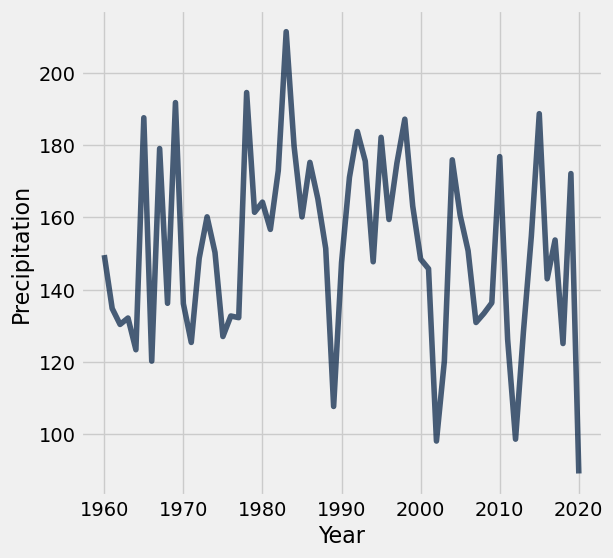

In [22]:
totals.plot("Year", "Precipitation")

### Assessing Drought Conditions with an A/B Test

To determine if the drought conditions from 2002-2005 and 2012-2020 can be explained by chance, I conducted an A/B test in which each year's total precipitation is an outcome, and the condition is whether or not the year is in the EPA's drought period.

First, I defined the `drought_label` function to distinguish between drought years and other years.

In [23]:
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

### Defining Null and Alternative Hypotheses for the A/B Test

- *Null hypothesis:* The average annual precipitation during drought years is the same as the average annual precipitation during other years. Any observed difference in precipitation is due to random chance.

- *Alternative hypothesis:* The average annual precipitation during drought years is less than the average annual precipitation during other years.

### Creating the Drought Table and Overlaid Histogram

First, I defined the table `drought` containing one row per year with the following columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, I constructed an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years.

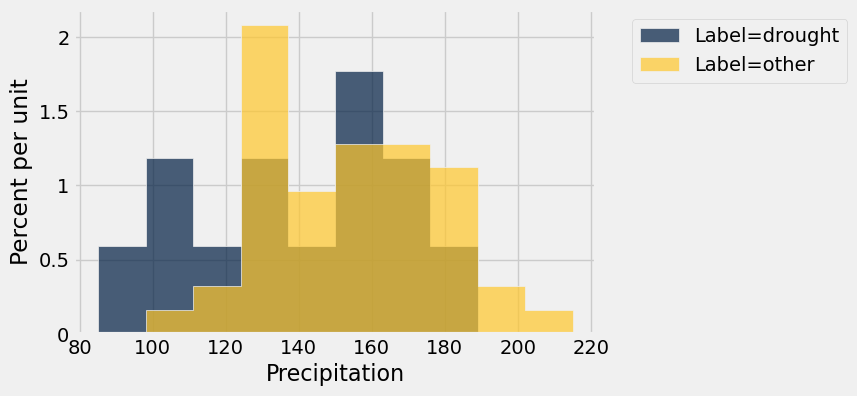

In [24]:
bins = np.arange(85, 215+1, 13)
drought_labeled = totals.apply(drought_label, 'Year')
drought = Table().with_columns('Label', drought_labeled, 'Precipitation', totals.column('Precipitation'))
drought.hist('Precipitation', bins = bins, group = 'Label')

### Inspecting the Histogram

Before continuing, I inspected the histogram to build intuition about the result of the A/B test. The histogram shows the distribution of total precipitation in Southwest cities for drought years and other years.

### Visual Observations

- The histogram for drought years appears to be shifted towards the lower precipitation values compared to the histogram for other years.
- There are fewer instances of high precipitation values during drought years, while other years show a wider spread of precipitation values, including higher amounts.
- This visual difference suggests that drought years tend to have lower total precipitation compared to other years.

### Intuition

Based on the histogram, it appears that drought years generally experience less precipitation than other years. This visual evidence supports the alternative hypothesis that drought years are drier compared to other years. However, to confirm this intuition, I will proceed with the A/B test to statistically assess the significance of this observation.

### Choosing a Test Statistic

Our next step is to choose a test statistic based on our alternative hypothesis in Question 2.2. The following options are valid choices for the test statistic:

1. The difference between the **total** precipitation in **drought** years and the **total** precipitation in **other** years.
2. The difference between the **total** precipitation in **other** years and the **total** precipitation in **drought** years.
3. The difference between the **average** precipitation in **drought** years and the **average** precipitation in **other** years.
4. The difference between the **average** precipitation in **other** years and the **average** precipitation in **drought** years.

### Validity of Test Statistics Involving Total Precipitation

I agree with the observation that there are more **other** years than **drought** years, which means that measuring the difference between total precipitation will always favor the **other** years. Here's why:

- The **other** years span a longer period and therefore have more data points contributing to the total precipitation. This will naturally result in a higher total precipitation for **other** years compared to the fewer **drought** years.
- When comparing total precipitation, the larger number of **other** years will skew the results, making it an unfair comparison. The higher total values for **other** years are not necessarily indicative of a lack of drought conditions but rather a result of having more data points.
- Therefore, options involving total precipitation are not valid test statistic choices because they do not account for the difference in the number of years being compared. Instead, using averages is a more appropriate method to compare the precipitation in drought versus other years, as it normalizes the data and provides a fair comparison.

Thus, the options involving the total precipitation would be skewed towards the years with more data points and higher total values, making them invalid for accurately comparing drought versus other years.

### Checking the `drought` Table

Before proceeding, I ensured that the `drought` table has two columns, `Label` and `Precipitation`, with 61 rows, 13 of which are for `"drought"` years.

In [25]:
drought.show(3)

Label,Precipitation
other,149.58
other,134.82
other,130.41


In [26]:
drought.group('Label')

Label,count
drought,13
other,48


### Calculating the Test Statistic

For our A/B test, I used the difference between the average precipitation in drought years and the average precipitation in other years as our test statistic:

$$\text{average precipitation in "drought" years} - \text{average precipitation in "other" years}$$

First, I completed the function `test_statistic` that takes in a two-column table `t` with one row per year and two columns:
- `Label`: the label for that year (either `'drought'` or `'other'`)
- `Precipitation`: the total precipitation in the 13 Southwest cities that year.

Then, I used this function to assign `observed_statistic` to the observed test statistic.

In [27]:
def test_statistic(t):
    grouped_means = t.group(t.column(0), np.average).drop(1)
    diff = grouped_means.column(1).item(0) - grouped_means.column(1).item(1)
    return diff

observed_statistic = test_statistic(drought)
observed_statistic

-15.856714743589748

### Simulating the Test Statistic Under the Null Hypothesis

To simulate the test statistic under the null hypothesis, I wrote the `simulate_precipitation_null` function. This function simulates the null hypothesis once and returns the value of the test statistic for that simulated sample.


In [28]:
def simulate_precipitation_null():
    sampled_drought = drought.sample(with_replacement = False).column(0)
    new_table = Table().with_columns('Sample', sampled_drought, 'Precipitation', drought.column(1))
    return test_statistic(new_table)

simulate_precipitation_null()

1.434439102564113

### Running the Simulation for the Hypothesis Test

To complete the simulation for the hypothesis test, I computed 5,000 values of the test statistic under the null hypothesis and stored the results in the array `sampled_stats`.

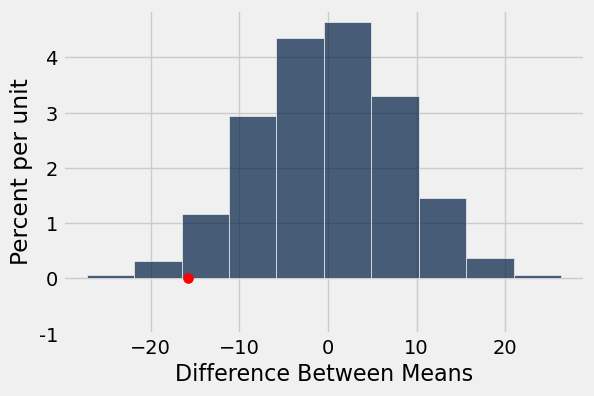

In [29]:
sampled_stats = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    stats = simulate_precipitation_null()
    sampled_stats = np.append(sampled_stats, stats)

Table().with_column('Difference Between Means', sampled_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50);
plt.ylim(-0.01);

### Computing the p-value for the Hypothesis Test

To compute the p-value for this hypothesis test, I compared the observed test statistic to the empirical distribution of test statistics under the null hypothesis. The p-value is the proportion of simulated test statistics that are less than or equal to the observed test statistic.

In [30]:
precipitation_p_val = np.count_nonzero(sampled_stats <= observed_statistic)/repetitions
precipitation_p_val

0.0256

### Conclusion from the Hypothesis Test

Since the precipitation p-value generated from my data is less than a cutoff of 5% (0.05), the data is statistically significant, and I can reject the null hypothesis that the drought years and other years have the same amounts of precipitation. This allows me to conclude that the data is more consistent with the alternative hypothesis and that drought years do indeed have lower amounts of precipitation compared to other years.

### Conclusion on the EPA's Statement on Drought

Based on the results of the hypothesis test, I can conclude that the EPA's statement on drought is supported by the data. The periods identified by the EPA as drought years (2002-2005 and 2012-2020) experienced significantly lower precipitation compared to other years. This indicates that these drought years are not just random occurrences but are statistically different from other years in terms of precipitation, aligning with the EPA's observation of persistent drought conditions in the Southwest region during these periods.

<!-- END QUESTION -->



# Conclusion

In this project, I explored the impacts of climate change by analyzing temperature and precipitation data for various U.S. cities, with a focus on Phoenix, Arizona, and the Southwest region.

### Temperature Analysis

By examining historical temperature data for Phoenix, I identified trends in average maximum and minimum temperatures over the years. The analysis revealed significant increases in temperatures for most months, supporting the hypothesis that climate change has led to warmer conditions in Phoenix. Specifically, the data showed that for the majority of months, the present-day temperatures were significantly higher than the historical averages, particularly during the warmer seasons.

### Precipitation Analysis

For the precipitation analysis, I examined total annual precipitation data for 13 cities in the Southwest region from 1960 to 2021. The focus was on assessing the impact of drought conditions as identified by the EPA for the periods 2002-2005 and 2012-2020.

Using an A/B test, I compared the average annual precipitation during drought years to other years. The hypothesis test showed that drought years had significantly lower precipitation compared to other years, with a p-value less than 0.05, allowing me to reject the null hypothesis. This supported the EPA's statement that large portions of the Southwest experienced persistent drought conditions during the specified periods.

### Key Takeaways

1. **Temperature Trends:** There is a clear upward trend in both average maximum and minimum temperatures in Phoenix, particularly from the early 1960s onwards, indicating the effects of modern-day global warming.
   
2. **Precipitation Trends:** The Southwest region experienced significantly lower precipitation during the EPA-identified drought periods (2002-2005 and 2012-2020) compared to other years, confirming the presence of drought conditions.

### Final Thoughts

The analysis conducted in this project highlights the tangible impacts of climate change on both temperature and precipitation patterns. The findings underscore the importance of continued monitoring and analysis of climate data to understand and mitigate the effects of climate change. By examining historical data and employing statistical methods, we can draw meaningful conclusions that inform policy and adaptation strategies for affected regions.
